In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('Facebook_Classification_prdiction.csv')

In [3]:
df

,post_type,category,post_month,post_weekday,post_hour,paid,cluster_2
0,Photo,2,12,4,3,0.0,Not-Viral
1,Status,2,12,3,10,0.0,Not-Viral
2,Photo,3,12,3,3,0.0,Not-Viral
3,Photo,2,12,2,10,1.0,Viral
4,Photo,2,12,2,3,0.0,Not-Viral
...,...,...,...,...,...,...,...
491,Photo,3,1,7,2,0.0,Not-Viral
492,Photo,2,1,5,8,0.0,Not-Viral
493,Photo,1,1,5,2,0.0,Not-Viral
494,Photo,3,1,4,11,0.0,Not-Viral


In [4]:
df = df.rename(columns={'cluster_2':'Target'})

In [125]:
df['Target'] = df['Target'].map({'Not-Viral':0,'Viral':1})

#### PreProcess Data
1. Encode `Post Type` and `Category`
2. what should we do with `DateTime Values`
3. We don't have any Scalling Columns For `Classification Prediction`
4. We have To solve Imbalance Data Problem

In [126]:
df

,post_type,category,post_month,post_weekday,post_hour,paid,Target
0,1,1,12,4,3,0.0,0
1,2,1,12,3,10,0.0,0
2,1,2,12,3,3,0.0,0
3,1,1,12,2,10,1.0,1
4,1,1,12,2,3,0.0,0
...,...,...,...,...,...,...,...
491,1,2,1,7,2,0.0,0
492,1,1,1,5,8,0.0,0
493,1,0,1,5,2,0.0,0
494,1,2,1,4,11,0.0,0


In [127]:
df.groupby(['paid','Target']).size() # It seems like Paid Isn't the one deciding which post is viral or not

paid  Target
0.0   0         331
      1          27
1.0   0         113
      1          25
dtype: int64

In [128]:
df.groupby(['post_type','Target']).size() # Most of the post that goes Viral are Photos

post_type  Target
0          0          18
           1           2
1          0         376
           1          48
2          0          44
           1           1
3          0           6
           1           1
dtype: int64

In [129]:
from sklearn.preprocessing import LabelEncoder
df['category'] = LabelEncoder().fit_transform(df['category'])
df['post_type'] = LabelEncoder().fit_transform(df['post_type'])

In [130]:
X = df.drop(columns='Target')
y = df['Target']

#### We will test it When data is Imbalance To see What will happen

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [132]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((396, 6), (100, 6), (396,), (100,))

In [133]:
sm = SMOTE(random_state=42)

In [134]:
X_train_b,y_train_b = sm.fit_resample(X_train,y_train)

In [163]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [164]:
rf = RandomForestClassifier(class_weight='balanced',random_state=2000) # without HyperParamet Tuning!

In [165]:
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [167]:
y_prob = rf.predict_proba(X_test)[:, 1]

for t in [0.5, 0.4, 0.3, 0.25, 0.2, 0.15]:
    y_pred = (y_prob >= t).astype(int)
    print("\nThreshold:", t)
    print(classification_report(y_test, y_pred))



Threshold: 0.5
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        87
           1       0.50      0.23      0.32        13

    accuracy                           0.87       100
   macro avg       0.70      0.60      0.62       100
weighted avg       0.84      0.87      0.85       100


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        87
           1       0.57      0.31      0.40        13

    accuracy                           0.88       100
   macro avg       0.74      0.64      0.67       100
weighted avg       0.86      0.88      0.86       100


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        87
           1       0.36      0.31      0.33        13

    accuracy                           0.84       100
   macro avg       0.63      0.61      0.62       100
weighted avg       0.83   

In [138]:
y_pred = rf.predict(X_test)

In [139]:
cm = confusion_matrix(y_test,y_pred)

<Axes: >

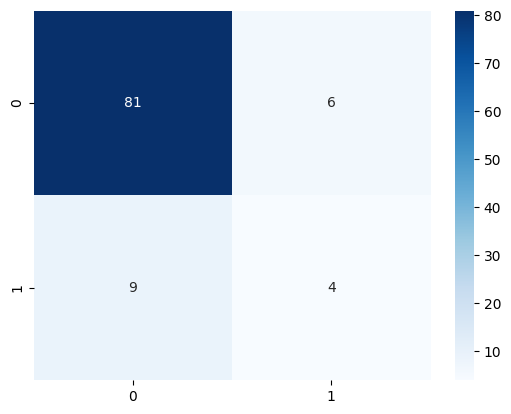

In [140]:
sns.heatmap(cm,annot=True,cmap='Blues')

In [141]:
f1_score(y_test,y_pred,average='weighted')

0.8414885777450257

In [142]:
accuracy_score(y_test,y_pred)

0.85

In [143]:
recall_score(y_test,y_pred,average='weighted')

0.85

In [144]:
cross_val_score(rf,X,y,cv=10)

array([0.86      , 0.82      , 0.9       , 0.88      , 0.86      ,
       0.88      , 0.89795918, 0.87755102, 0.79591837, 0.85714286])

In [145]:
import pandas as pd

# Use the columns from your training data (X), not the whole dataframe
feature_importance = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

        Feature  Importance
5          paid    0.307030
4     post_hour    0.210281
2    post_month    0.207803
3  post_weekday    0.158701
1      category    0.078405
0     post_type    0.037780


In [146]:
gb = GradientBoostingClassifier(random_state=42,n_estimators=500)

In [147]:
gb.fit(X_train_b,y_train_b)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [148]:
gb.score(X_test,y_test)

0.85

In [149]:
y_pred_gb = gb.predict(X_test)

In [150]:
f1_score(y_test,y_pred_gb,average='weighted')

0.8474285714285714

In [151]:
recall_score(y_test,y_pred_gb,average='weighted')

0.85

In [152]:
y_test.value_counts()

Target
0    87
1    13
Name: count, dtype: int64

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        87
           1       0.40      0.31      0.35        13

    accuracy                           0.85       100
   macro avg       0.65      0.62      0.63       100
weighted avg       0.83      0.85      0.84       100



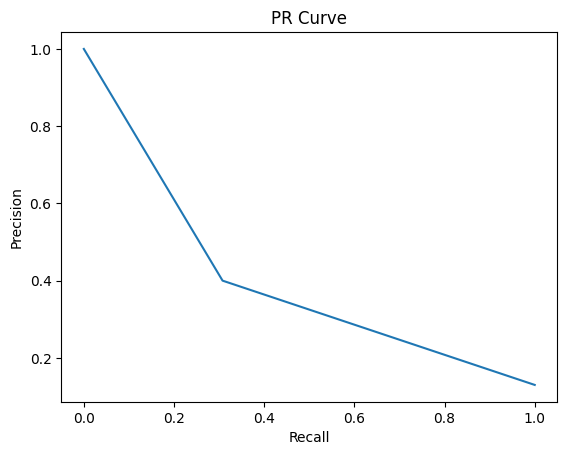

In [154]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve")
plt.show()


In [155]:
from sklearn.linear_model import LogisticRegression

In [157]:
l = LogisticRegression(class_weight='balanced')

In [158]:
l.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [160]:
y_pred = l.predict(X_test)

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        87
           1       0.19      0.38      0.25        13

    accuracy                           0.70       100
   macro avg       0.54      0.57      0.53       100
weighted avg       0.80      0.70      0.74       100



In [162]:
f1_score(y_test,y_pred)

0.25